# Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

#It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

#  Time
contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction 
# Amount 
this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import pandas as pd



In [2]:
fraud=pd.read_csv("creditcard.csv")
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(fraud.shape)
print(fraud.size)  #returns total no.of elemnts.===  rows* columns
print(fraud.columns)
#print(fraud.dtype)#  error   because there is no dtype attribute
print(fraud.ndim)  # returns dimensions of data....dataframe is actually 2 dimensional.. series is 1 dimensional 
#  how to represent 3d data ?


(284807, 31)
8829017
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
2


In [4]:
print(fraud.describe())
fraud.describe(percentiles=[0,0.1,0.2,0.25,0.5,0.75,0.8,0.9,1])

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
0%,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
10%,35027.000000,-1.893272e+00,-1.359862e+00,-1.802587e+00,-1.656329e+00,-1.302171e+00,-1.167450e+00,-1.078148e+00,-4.589454e-01,-1.294047e+00,...,-3.674467e-01,-8.674884e-01,-3.286342e-01,-8.703584e-01,-6.061010e-01,-5.480343e-01,-2.114656e-01,-1.556155e-01,1.000000,0.000000
20%,47694.200000,-1.134663e+00,-7.908142e-01,-1.169050e+00,-1.066085e+00,-8.595815e-01,-8.781527e-01,-6.833164e-01,-2.662999e-01,-8.088755e-01,...,-2.663929e-01,-6.416046e-01,-2.037425e-01,-4.442769e-01,-3.917190e-01,-3.895481e-01,-9.111428e-02,-6.544115e-02,3.570000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000


In [5]:
#  find missing  values 
fraud.isnull()  # displays false for a not null value and true for a null value.. in our datset , there are no null values present


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
print(fraud.isnull().values)
fraud.isnull().values.sum()  # returns no.of missing values in the dataset

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


0

In [7]:
fraud.describe(exclude=[object])  # exclude string objects if any

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
fraud.describe(exclude=['category']) # exclude any categorical 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#fraud.describe(include=['category'])   # returns error  because there are no categorical variables.

In [10]:
#the below code is not at all related to problem. i am doing it for my knowledge.

#I will create a new datframe with gender as column and male and female as values 
data={'gender':['male','female'],'sampleclass':[0,1]}   
new=pd.DataFrame(data)
#new=pd.DataFrame(data,columns=['gender'])   # if i use columns ='gender' it will return an error..just try
new



,gender,sampleclass
0,male,0
1,female,1


In [11]:
# i want to merge new dataframe and fraud dataframe.  with  class label 0 as male and 1 as female.
fraud2=fraud.copy()
fraud2
fraud2=fraud2.merge(new,left_on="Class",right_on='sampleclass')

In [12]:
fraud2.gender  #  fraud2.['gender']   both are same ..accessing coluumns

0           male
1           male
2           male
3           male
4           male
           ...  
284802    female
284803    female
284804    female
284805    female
284806    female
Name: gender, Length: 284807, dtype: object

In [13]:
fraud.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
fraud.iloc[4]

# z=pd.Series(list(a,b,c,d,e),index=[45,46,48,49,47])



Time       2.000000
V1        -1.158233
V2         0.877737
V3         1.548718
V4         0.403034
V5        -0.407193
V6         0.095921
V7         0.592941
V8        -0.270533
V9         0.817739
V10        0.753074
V11       -0.822843
V12        0.538196
V13        1.345852
V14       -1.119670
V15        0.175121
V16       -0.451449
V17       -0.237033
V18       -0.038195
V19        0.803487
V20        0.408542
V21       -0.009431
V22        0.798278
V23       -0.137458
V24        0.141267
V25       -0.206010
V26        0.502292
V27        0.219422
V28        0.215153
Amount    69.990000
Class      0.000000
Name: 4, dtype: float64

In [15]:
fraud=fraud.drop_duplicates()
fraud# few duplicates are found  ..records decreased from 284807 to 283726

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [16]:
fraud.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 283726, dtype: bool

In [17]:
fraud.loc[fraud.duplicated()]  # duplicated rows   since we alraedy removed the duplicates..no duplicates found

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [18]:
fraud.loc[[0,1,2,3,4,5]]   # loc is based on labels

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [19]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


C:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


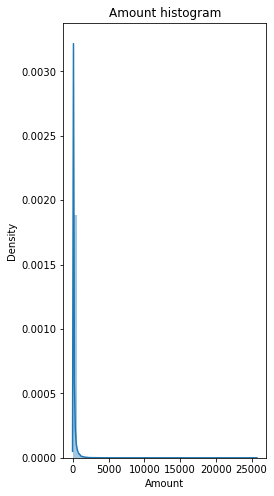

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))    
plt.subplot(1,2,1)
plt.title("Amount histogram")   #plt.subtitle..error there is no subtitle attribute 
sns.distplot(fraud.Amount)
plt.show()

In [21]:

fraud.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

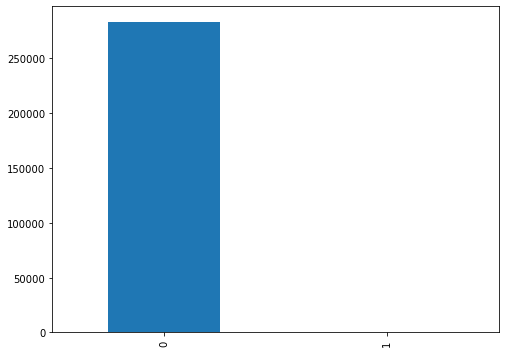

In [22]:
plt.figure(figsize=(8,6))
fraud.Class.value_counts().plot(kind='bar')
plt.show()  # even if we dont use this line output is printing

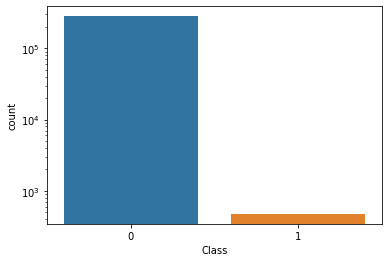

In [23]:
a=sns.countplot(x='Class', data=fraud)
a.set_yscale("log")   # try replacing "log" with "linear"

In [24]:
print(enumerate(fraud.columns))

In [25]:
for count,value in enumerate(fraud,start=1):
    print(count,value)

1 Time
2 V1
3 V2
4 V3
5 V4
6 V5
7 V6
8 V7
9 V8
10 V9
11 V10
12 V11
13 V12
14 V13
15 V14
16 V15
17 V16
18 V17
19 V18
20 V19
21 V20
22 V21
23 V22
24 V23
25 V24
26 V25
27 V26
28 V27
29 V28
30 Amount
31 Class


<ipython-input-26-087c91551d5d>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(r,c,j+1)


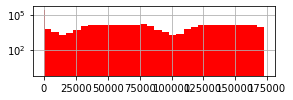

<Figure size 432x288 with 0 Axes>

In [26]:
fig=plt.figure(figsize=(20,12))
for i in fraud.columns:
    r=8
    c=4
    j=1
    ax=fig.add_subplot(r,c,j+1)
    fraud[i].hist(ax=ax,bins=30,color="red") # try using alambda function for all columns
    plt.yscale('log')
    j+=1
plt.show()
plt.tight_layout()

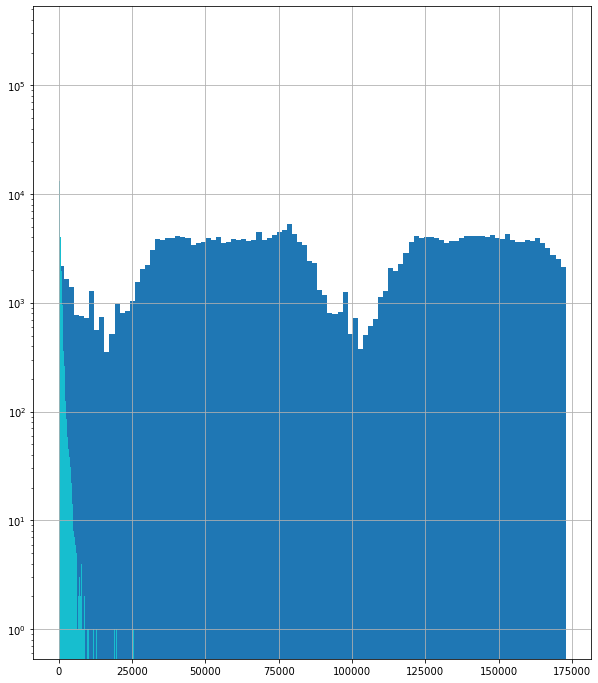

In [27]:
plt.figure(figsize=(10,20))
for i, feature in enumerate(fraud.columns):
    fraud[feature].hist(bins=100,figsize=(10,12))
   # plt.set_yscale('log')   # error AttributeError: module 'matplotlib.pyplot' has no attribute 'set_yscale'
    plt.yscale('log')
plt.show()

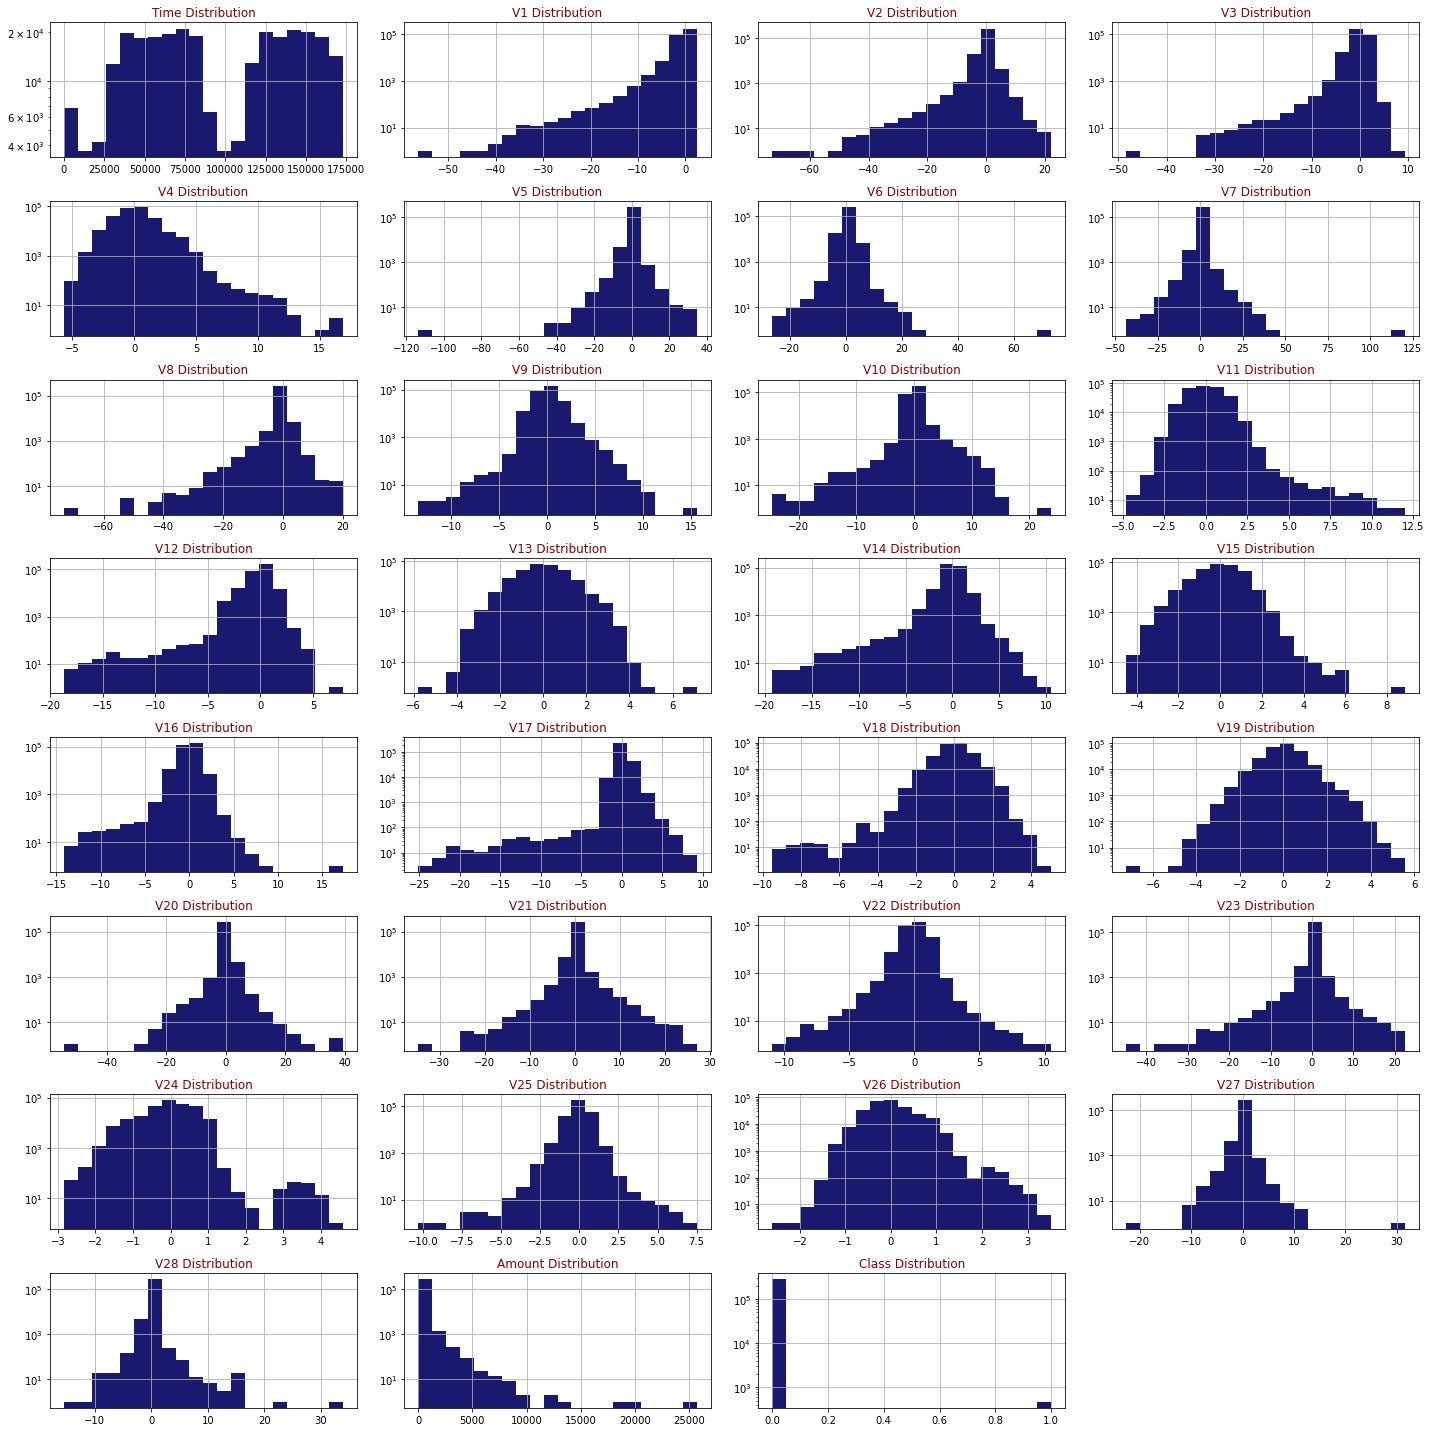

In [28]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(fraud,fraud.columns,8,4)

# correlation matrix

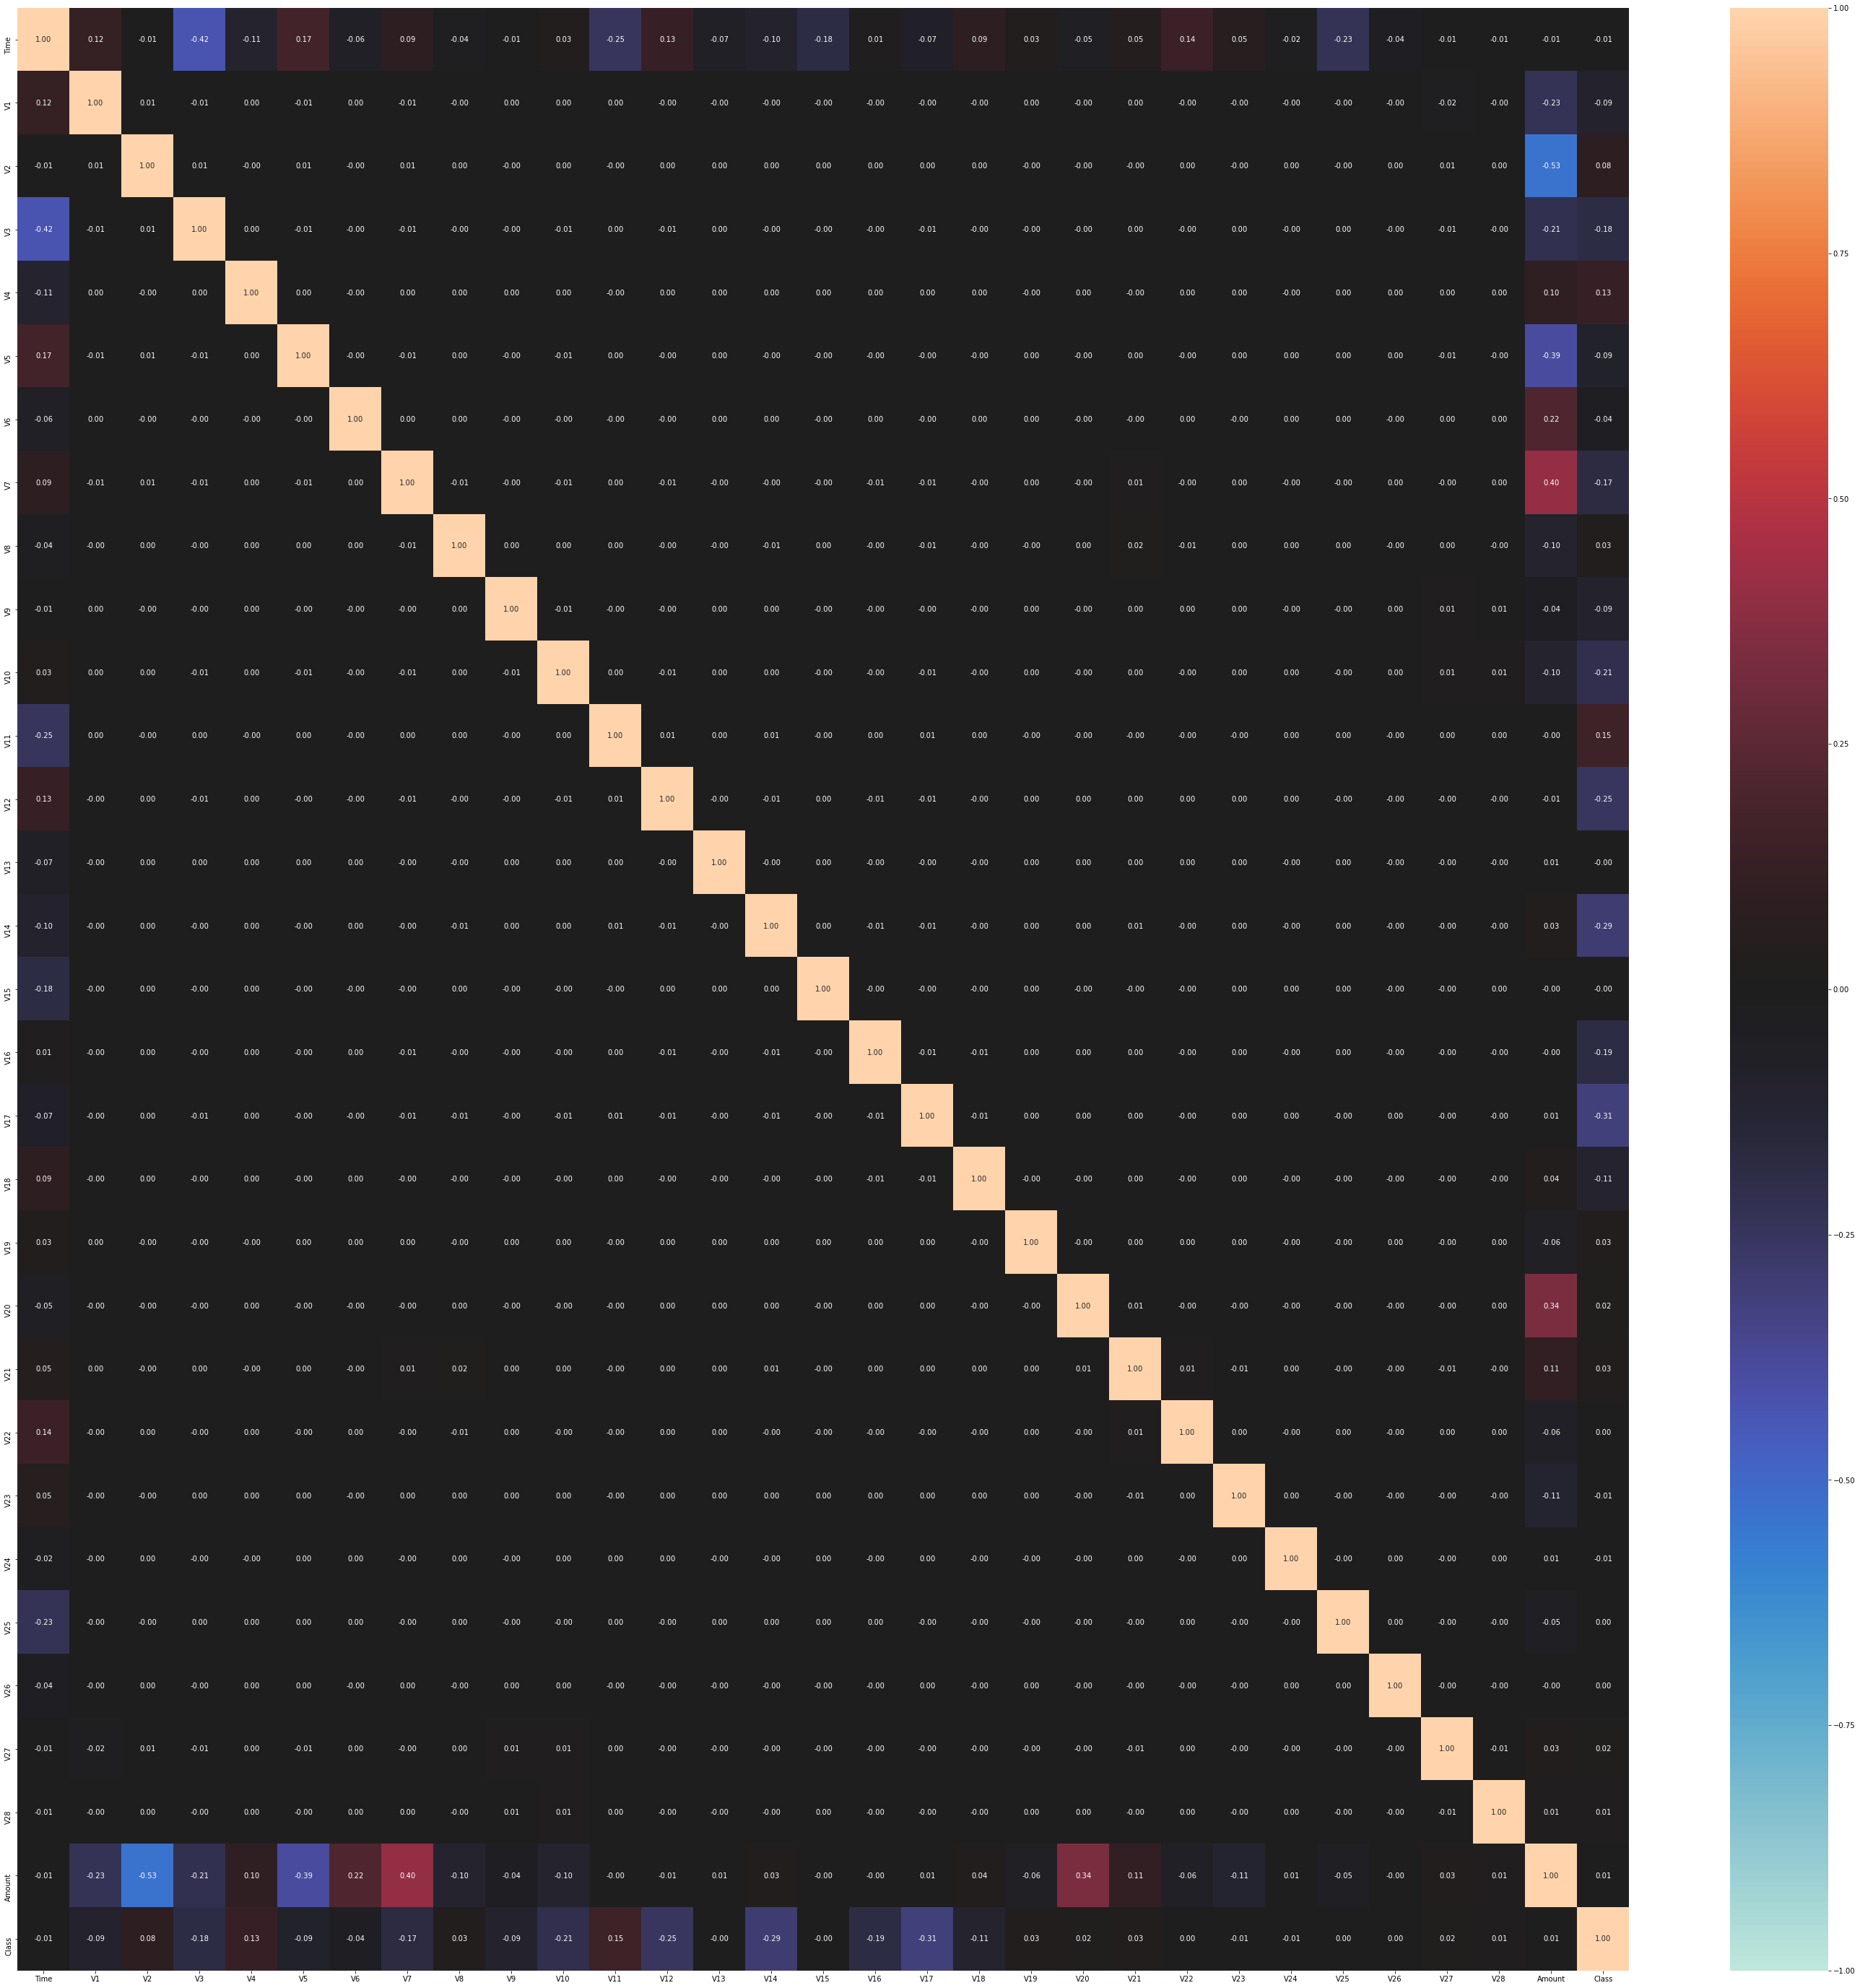

In [29]:
plt.figure(figsize=(50,50))
sns.heatmap(fraud.corr(),annot=True,fmt='0.2f',vmin=-1,vmax=1,center=0)#cmap='cubehelix') # annot= true means fills the box with correlation values
plt.show()     # not at all visible...(wrong thought)so to find collinear featues we will find vif values  (not sure)



In [30]:
fraud.shape

(283726, 31)

In [31]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

# Logistic regression


In [32]:
estimators=fraud.columns
estimators

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [33]:
#estimators.pop("Class")

In [34]:
y=fraud.pop("Class")
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [35]:
X1=fraud
X1
#X=fraud[ : , 0:30]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [36]:
import statsmodels.api as sm
X=sm.add_constant(X1)
print(X)


        const      Time         V1         V2        V3        V4        V5  \
0         1.0       0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1         1.0       0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2         1.0       1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3         1.0       1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4         1.0       2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...       ...       ...        ...        ...       ...       ...       ...   
284802    1.0  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803    1.0  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804    1.0  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805    1.0  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806    1.0  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8  ...       V20

In [37]:
log_reg=sm.Logit(y,X) 
print(log_reg)#1/(1+e^-x)
result=log_reg.fit()
print(result.params)  # coefficient values
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.003922
         Iterations 13
const    -8.398344
Time     -0.000004
V1        0.096131
V2        0.010612
V3       -0.008339
V4        0.701340
V5        0.130510
V6       -0.123969
V7       -0.094802
V8       -0.176594
V9       -0.282541
V10      -0.823049
V11      -0.057903
V12       0.083122
V13      -0.325695
V14      -0.547687
V15      -0.120703
V16      -0.199152
V17      -0.013892
V18      -0.013858
V19       0.098545
V20      -0.461622
V21       0.394447
V22       0.637670
V23      -0.102071
V24       0.119142
V25      -0.050561
V26       0.009442
V27      -0.826467
V28      -0.297275
Amount    0.000923
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283695
Method:                           MLE   Df Model:       

In [38]:
# just for my understanding   loc  vs iloc

z=pd.Series(list("abcde"),index=[45,46,48,49,47])
print(z)

print(z.loc[45]) # based on label
print (z.iloc[0]) # based on index location

45    a
46    b
48    c
49    d
47    e
dtype: object
a
a


In [39]:
# elimination of fetuares whose p value > 0.05

#print(result.pvalues)
#print(result.pvalues['Time'])#

#c=result.pvalues
#print(c)
#while True:

In [40]:
#for i,column in enumerate(fraud.columns):
 #   print(i,column)
  #  q=result.pvalues[column]
   # print(q)
    #if q>0.05:
     #   fraud.drop(q.index)
    #else:
     #   pass
#print(fraud)
    

In [41]:
#columns=fraud.columns
#columns

In [42]:
#dict={'columns':result.pvalues}
#dict
#k=pd.DataFrame.from_dict(dict)    # dict to dataframe
#for i in range(,len(columns)):
#    t=[]
#    if k[i]>0.05:
#        break
#    else:
#        t.append(column)

In [43]:
X=X.drop(columns=['V26','V25','V24',"Time","V2",'V3','V7','V11','V12','V15','V16','V17','V19'])
X

,const,V1,V4,V5,V6,V8,V9,V10,V13,V14,V18,V20,V21,V22,V23,V27,V28,Amount
0,1.0,-1.359807,1.378155,-0.338321,0.462388,0.098698,0.363787,0.090794,-0.991390,-0.311169,0.025791,0.251412,-0.018307,0.277838,-0.110474,0.133558,-0.021053,149.62
1,1.0,1.191857,0.448154,0.060018,-0.082361,0.085102,-0.255425,-0.166974,0.489095,-0.143772,-0.183361,-0.069083,-0.225775,-0.638672,0.101288,-0.008983,0.014724,2.69
2,1.0,-1.358354,0.379780,-0.503198,1.800499,0.247676,-1.514654,0.207643,0.717293,-0.165946,-0.121359,0.524980,0.247998,0.771679,0.909412,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.863291,-0.010309,1.247203,0.377436,-1.387024,-0.054952,0.507757,-0.287924,1.965775,-0.208038,-0.108300,0.005274,-0.190321,0.062723,0.061458,123.50
4,1.0,-1.158233,0.403034,-0.407193,0.095921,-0.270533,0.817739,0.753074,1.345852,-1.119670,-0.038195,0.408542,-0.009431,0.798278,-0.137458,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.0,-11.881118,-2.066656,-5.364473,-2.606837,7.305334,1.914428,4.356170,-0.689256,4.626942,0.510632,1.475829,0.213454,0.111864,1.014480,0.943651,0.823731,0.77
284803,1.0,-0.732789,-0.738589,0.868229,1.058415,0.294869,0.584800,-0.975926,1.214756,-0.675143,-1.221179,0.059616,0.214205,0.924384,0.012463,0.068472,-0.053527,24.79
284804,1.0,1.919565,-0.557828,2.630515,3.031260,0.708417,0.432454,-0.484782,-0.183699,-0.510602,0.395652,0.001396,0.232045,0.578229,-0.037501,0.004455,-0.026561,67.88
284805,1.0,-0.240440,0.689799,-0.377961,0.623708,0.679145,0.392087,-0.399126,-1.042082,0.449624,1.113981,0.127434,0.265245,0.800049,-0.163298,0.108821,0.104533,10.00


In [44]:
log_reg=sm.Logit(y,X) 
print(log_reg)#1/(1+e^-x)
result=log_reg.fit()
print(result.params)  # coefficient values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.003956
         Iterations 13
const    -8.701711
V1        0.058649
V4        0.733565
V5        0.081833
V6       -0.139072
V8       -0.195206
V9       -0.167584
V10      -0.843612
V13      -0.327275
V14      -0.512923
V18      -0.245955
V20      -0.291883
V21       0.454706
V22       0.710597
V23      -0.111546
V27      -0.704969
V28      -0.257095
Amount    0.000294
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283708
Method:                           MLE   Df Model:                           17
Date:                Thu, 17 Jun 2021   Pseudo R-squ.:                  0.6792
Time:                        12:17:31   Log-Likelihood:                -1122.4
converged:                       True   LL-Null:                  

In [45]:
print(X)

        const         V1        V4        V5        V6        V8        V9  \
0         1.0  -1.359807  1.378155 -0.338321  0.462388  0.098698  0.363787   
1         1.0   1.191857  0.448154  0.060018 -0.082361  0.085102 -0.255425   
2         1.0  -1.358354  0.379780 -0.503198  1.800499  0.247676 -1.514654   
3         1.0  -0.966272 -0.863291 -0.010309  1.247203  0.377436 -1.387024   
4         1.0  -1.158233  0.403034 -0.407193  0.095921 -0.270533  0.817739   
...       ...        ...       ...       ...       ...       ...       ...   
284802    1.0 -11.881118 -2.066656 -5.364473 -2.606837  7.305334  1.914428   
284803    1.0  -0.732789 -0.738589  0.868229  1.058415  0.294869  0.584800   
284804    1.0   1.919565 -0.557828  2.630515  3.031260  0.708417  0.432454   
284805    1.0  -0.240440  0.689799 -0.377961  0.623708  0.679145  0.392087   
284806    1.0  -0.533413 -0.506271 -0.012546 -0.649617 -0.414650  0.486180   

             V10       V13       V14       V18       V20       

In [46]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,)
log_reg=LogisticRegression()
a=log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
y_pred



C:\Users\prasa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84975
           1       0.88      0.57      0.69       143

    accuracy                           1.00     85118
   macro avg       0.94      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118



In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[84964,    11],
       [   62,    81]], dtype=int64)

In [50]:
conf_matrix=pd.DataFrame(data=cm,index=["predicted:0","predicted:1"],columns=["Actual:0","Actual:1"])
conf_matrix

,Actual:0,Actual:1
predicted:0,84964,11
predicted:1,62,81


<AxesSubplot:>

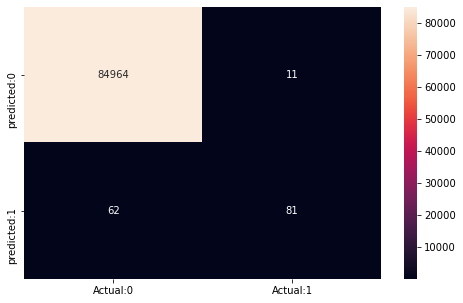

In [51]:
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,color="red",fmt="d")

# total no.of observations= 283726
# train=283726*0.7=198608
# test=283726-198608=85118

# so out of 85118 ,, 
# 84972 are correctly classified i.e no fraud occurs 
# in 54 observations, the transcation  is predicted as fraud even though there is no fraud happens
# in 80 observations, the transaction is predicted as fraud which is actaully fraud 
# in 12 observatrions, the transaction is  predicted as not fraud but actually they are fraud transactions.


In [52]:
Accuracy=(84972+80)/(84972+80+12+54)
print("Accuracy :", Accuracy)

Accuracy : 0.9992246058413027


# True positive= 80
# True negatives= 84972
# False positives = 54 Type i error
# False Negatives = 12  Type ii error

# for balanced dataset we use accuracy as a metrics
# but for imbalanced data set like this, we use precision and recall as a metrics


In [53]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[1,0] 
FN=cm[0,1]
Recall=TP/(TP+FN)
print("Sensitivity / true positive rate or recall :", Recall)


Sensitivity / true positive rate or recall : 0.8804347826086957


In [54]:
Precision= TP/ (TP+FP)
print("Prescision or positive predcted value:", Precision)

Prescision or positive predcted value: 0.5664335664335665
